# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [1]:
def decimalToBinary(n): 
    return bin(n).replace("0b", "") 

In [2]:
from numpy.random import normal, binomial
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [14]:
def plot_2d(X,y):
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    plt.scatter(x1[y==0], x2[y==0], s=5, c='r')
    plt.scatter(x1[y==1], x2[y==1], s=5, c='b')
    plt.title("".join(str(y)))
    plt.show()

In [36]:
# S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(S_n, plot = False):

    n = S_n.shape[0]
    d = S_n.shape[1]
    svc = SVC(C=1000, shrinking=False, kernel="linear", tol=1e-05)
    
    for i in range(2**(n-1)-1):
        y = [int(x) for x in [*decimalToBinary(i)]]
        y = np.array([0] * (n-len(y)) + y)
        if len(set(y)) == 1:
            continue
        svc.fit(S_n, y)
        if svc.score(S_n, y) != 1:
            if d == 2 and plot:
                plot_2d(S_n,y)
            return False
        # check if they are linearly separable
        # i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0

    # if for at least for one y the answer is no, then return False, else return True
    return True

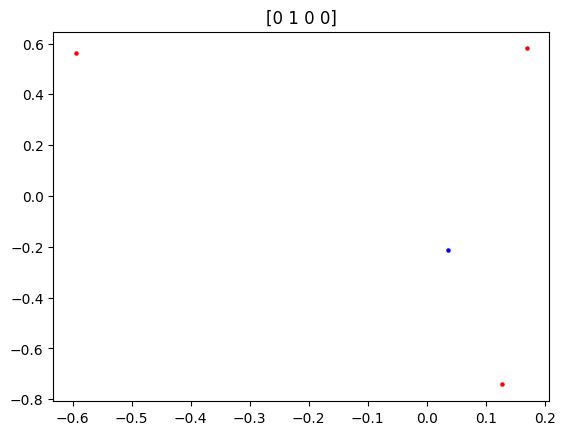

False

In [24]:
d=2
n=4

X = normal(0,1, [n,d])
Y = binomial(1, 0.5, n)

is_shattered(X, plot = True)

### c)

Can be shatered: False


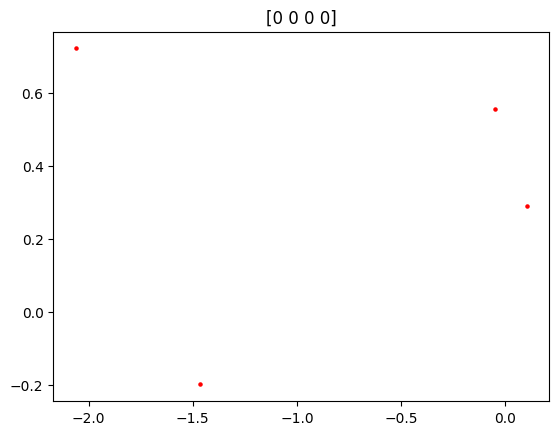

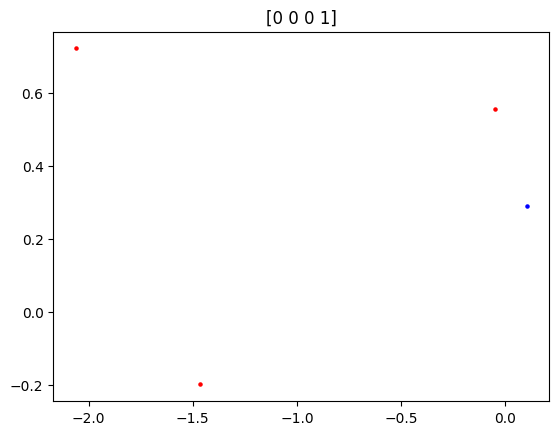

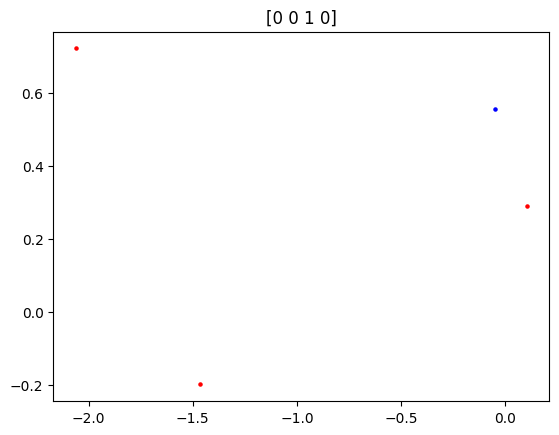

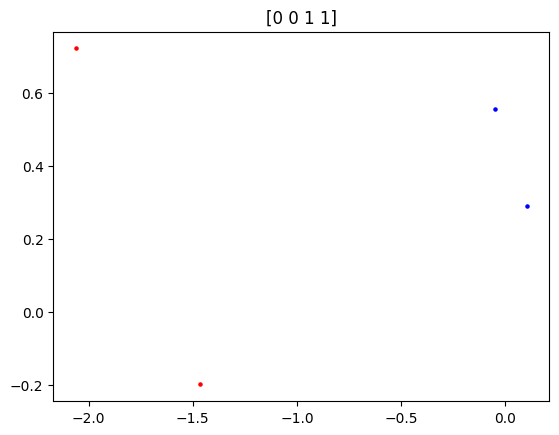

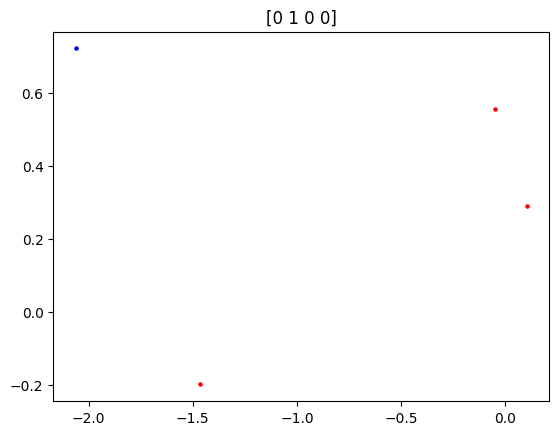

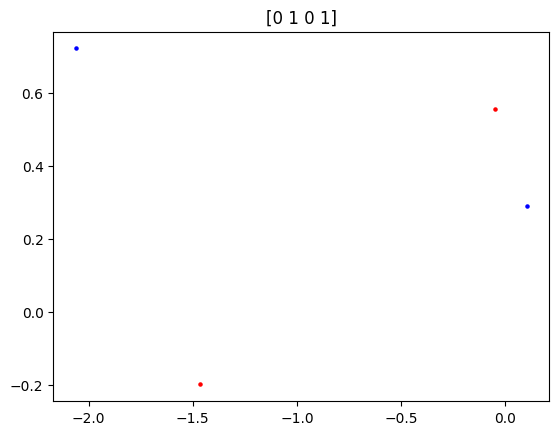

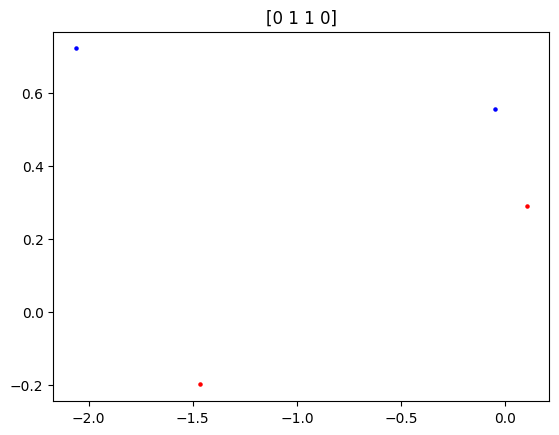

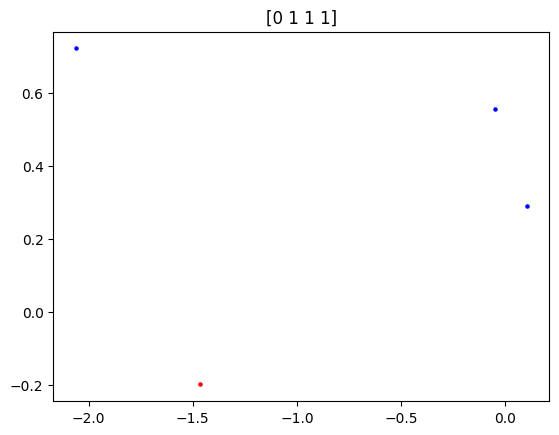

In [25]:
d=2
n=4
X = normal(0,1, [n,d])
print(f"Can be shatered: {is_shattered(X, plot = False)}")
for i in range(2**(n-1)):
    y = [int(x) for x in [*decimalToBinary(i)]]
    y = np.array([0] * (n-len(y)) + y)
    plot_2d(X,y)

It cannot be shatered for the combinatino 1010 (XOR)

### d)

In [37]:
d = 2
def vc(d, n_checks=50):
    for n in range(2,15):
        results_per_n = []
        for _ in range(n_checks):
            X = normal(0,1, [n,d])
            results_per_n = [*results_per_n, not is_shattered(X)]
        if any(results_per_n):
            return n
        
    print("Max achieved: {n}")
    return n


In [54]:
vc_results = {k:vc(k) for k in list(range(2,11))}

In [46]:
import pandas as pd 
import plotnine as p9

In [56]:
vc_results_df = pd.DataFrame(vc_results, index=["VC"]).T.reset_index(names="d")

In [57]:
vc_results_df

,d,VC
0,2,3
1,3,4
2,4,5
3,5,6
4,6,7
5,7,8
6,8,9
7,9,10
8,10,10


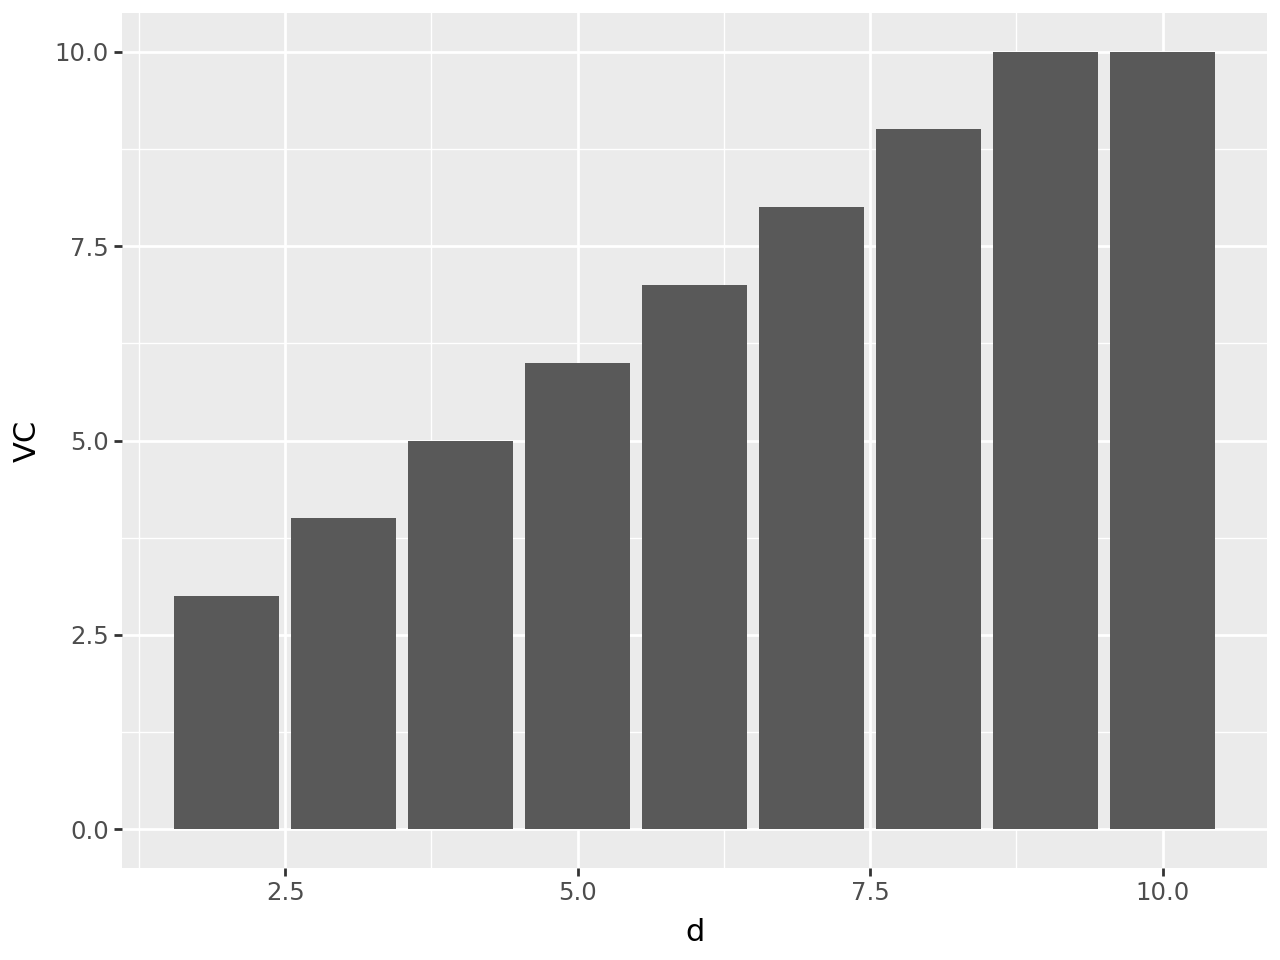

In [58]:
(
    p9.ggplot(vc_results_df, p9.aes(x="d", y="VC"))
    + p9.geom_col(stat="identity")  # modified
)  

Results as in the lecture besides the d=10

### e)

In [ ]:
# A hint: change a kernel in SVM